# Importando bibliotecas


In [1]:
# Bibliotecas para tratar os dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 

# Biblioteca para manipular diferentes partes do ambiente de tempo de execução do Python
import sys

# Biblioteca para manipular o sistema operacional
import os

# Adicionando o caminho na variavel ambiente de todas as coisas que são refatoradas
sys.path.append(os.getenv('PATH_SRC'))

# Configurando para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Importando funções criadas
import config, custom_funcs

# Importando o dataset

In [2]:
#importando dataset de treino
data_train = pd.read_csv(config.house_prices_train)
data_train.shape

(1460, 81)

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data = data_train.drop(columns='Id').copy()

## Observações sobre o dataset

In [5]:
print(f'O dataframe total possui {data.shape[0]} linhas e {data.shape[1]} colunas.')

O dataframe total possui 1460 linhas e 80 colunas.


In [6]:
numeric_columns = data.select_dtypes(include=[np.number])
categorical_columns = data.select_dtypes(exclude=[np.number])

print(f'A dataset possui {len(numeric_columns.columns)} colunas numéricas e {len(categorical_columns.columns)} colunas não-numéricas')

A dataset possui 37 colunas numéricas e 43 colunas não-numéricas


In [8]:
print(f'As colunas numéricas são: \n {numeric_columns.columns.to_list()}')
print(f'As colunas não-numéricas são: \n {categorical_columns.columns.to_list()}')

As colunas numéricas são: 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
As colunas não-numéricas são: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiona

Ao comparar os dados com a descrição do conjunto, percebe-se que a feature MSSubClass está como numérica, mas cada número correspondente a uma categoria.

# EDA (Exploratory Data Analysis)

In [9]:
#a feature MSSubClass é uma feature categórica
numeric_columns = numeric_columns.drop(columns = ['MSSubClass'])
categorical_columns['MSSubClass'] = data['MSSubClass']

### Para a exploração desse conjunto de dados serão feitas análises univariadas, a fim de entender o conjunto do estudo e verificar possíveis anomalias, além de análises bivariada e multivariada, onde tentaremos entender a relação entre as váriaveis, como a váriavel alvo se comporta em cada feature e tentaremos responder algumas hipoteses sobre os dados.

In [10]:
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


Pode-se perceber a ocorrência de alguns desvios padrões altos, ou seja, alta variabilidade em algumas features, assim como a média distinta da mediana, ou seja, dados com a distribuição diferente da curva de distribuição normal, com presença de outliers. Exemplos: 
- LotArea possui um desvio padrão de 9.981,26 e média de 10.516,8
- MasVnrArea possui uma média de 103,68 e uma mediana de 0, enquanto o valor máximo é igual a 1600
- Temos uma grande quantidade de features (13) com mais de 50% dos dados iguais a zero

Como também temos algumas features que possuem uma baixa variância, o que pode indicar um menor poder explicativo dessa feature, podendo representar a retirada dessa feature na construção do modelo. Exemplos:
- BsmtHalfBath possui um desvio padrão de 0,24 e 75% dos dados são de 0
- KitchenAbvGr possui um desvio padrão de 0,22 e 50% (ou mais) são de 1

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

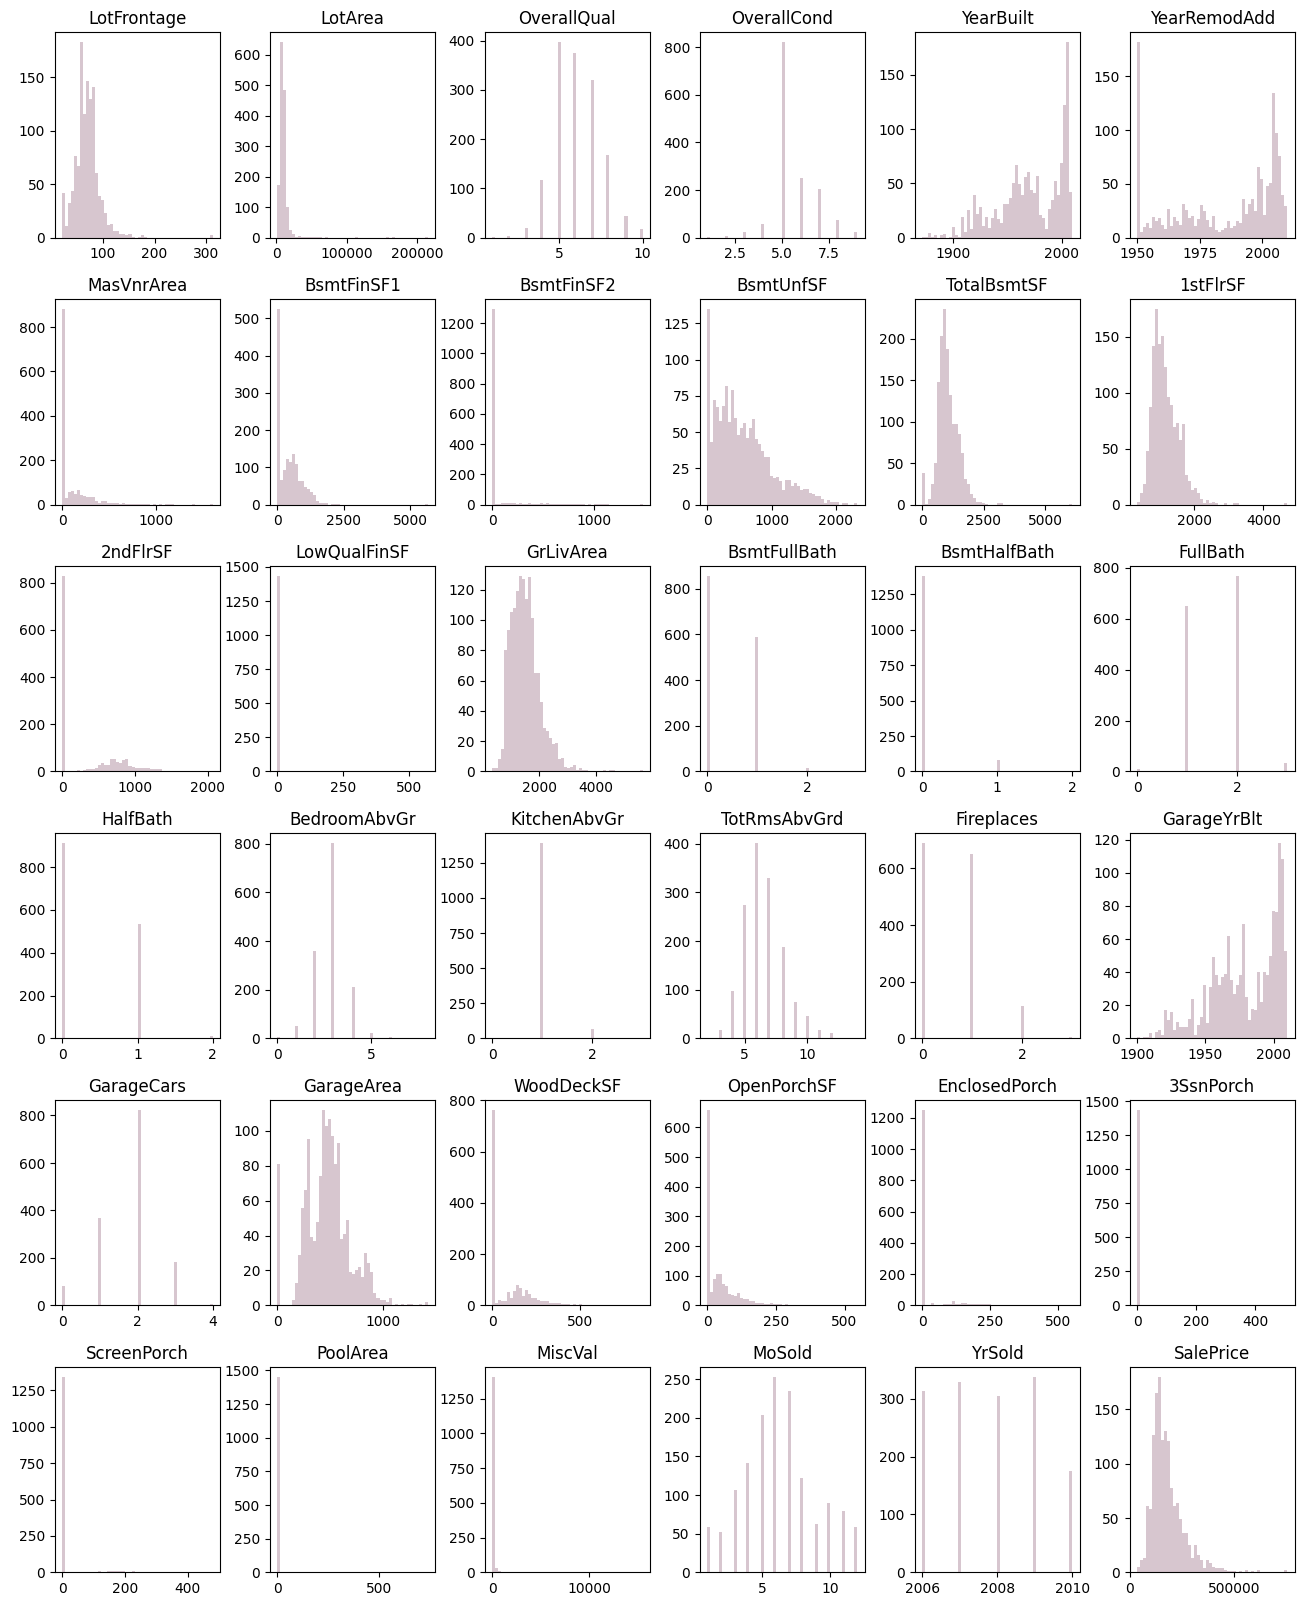

In [11]:
numeric_columns.hist(figsize=(16, 20), bins=50, grid=False, color='#d7c6cf')

Com a plotagem do histograma das variáveis numéricas do dataset, é possível visualizar a distribuição dos dados de cada target. 
Pode-se perceber a alta ocorrência de zeros em algumas features, como por exemplo em:
- MasVnrArea
- BstmFinSF2
- 2ndFlrSF
- LowQualFinSF
- BsmtHalf
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

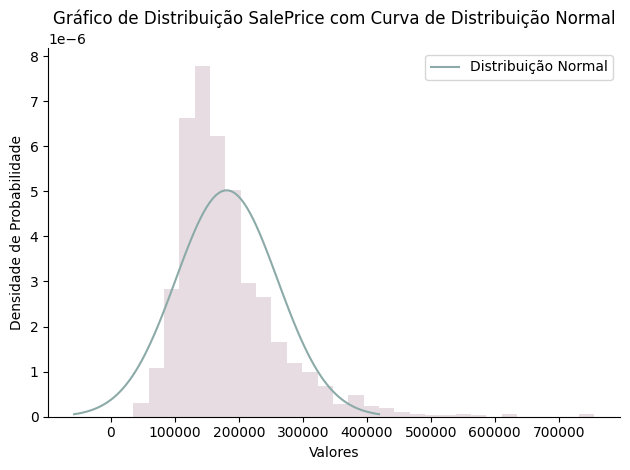

In [12]:
custom_funcs.grafico_distribuicao(data['SalePrice'])

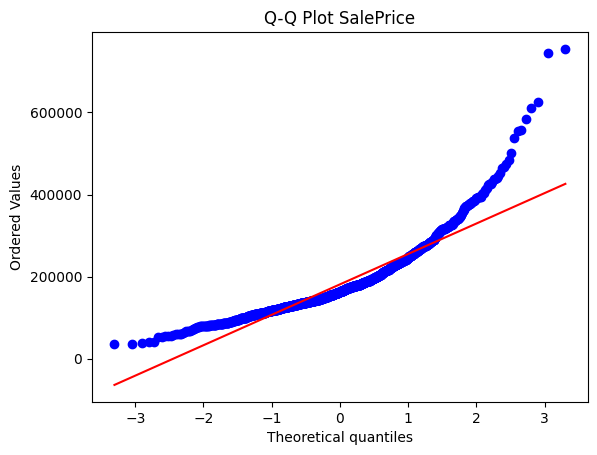

In [13]:
stats.probplot(data['SalePrice'], dist='norm', plot=plt)
plt.title("Q-Q Plot SalePrice")
plt.show()

Com o gráfico de distribuição da target SalesPrice, juntamente com a curva de distribuição normal, pode-se verificar a assimetria dos dados. Assim como, com o gráfico Q-Q Plot, verificou-se que a distribuição do dados não segue a distribuição normal

<Axes: >

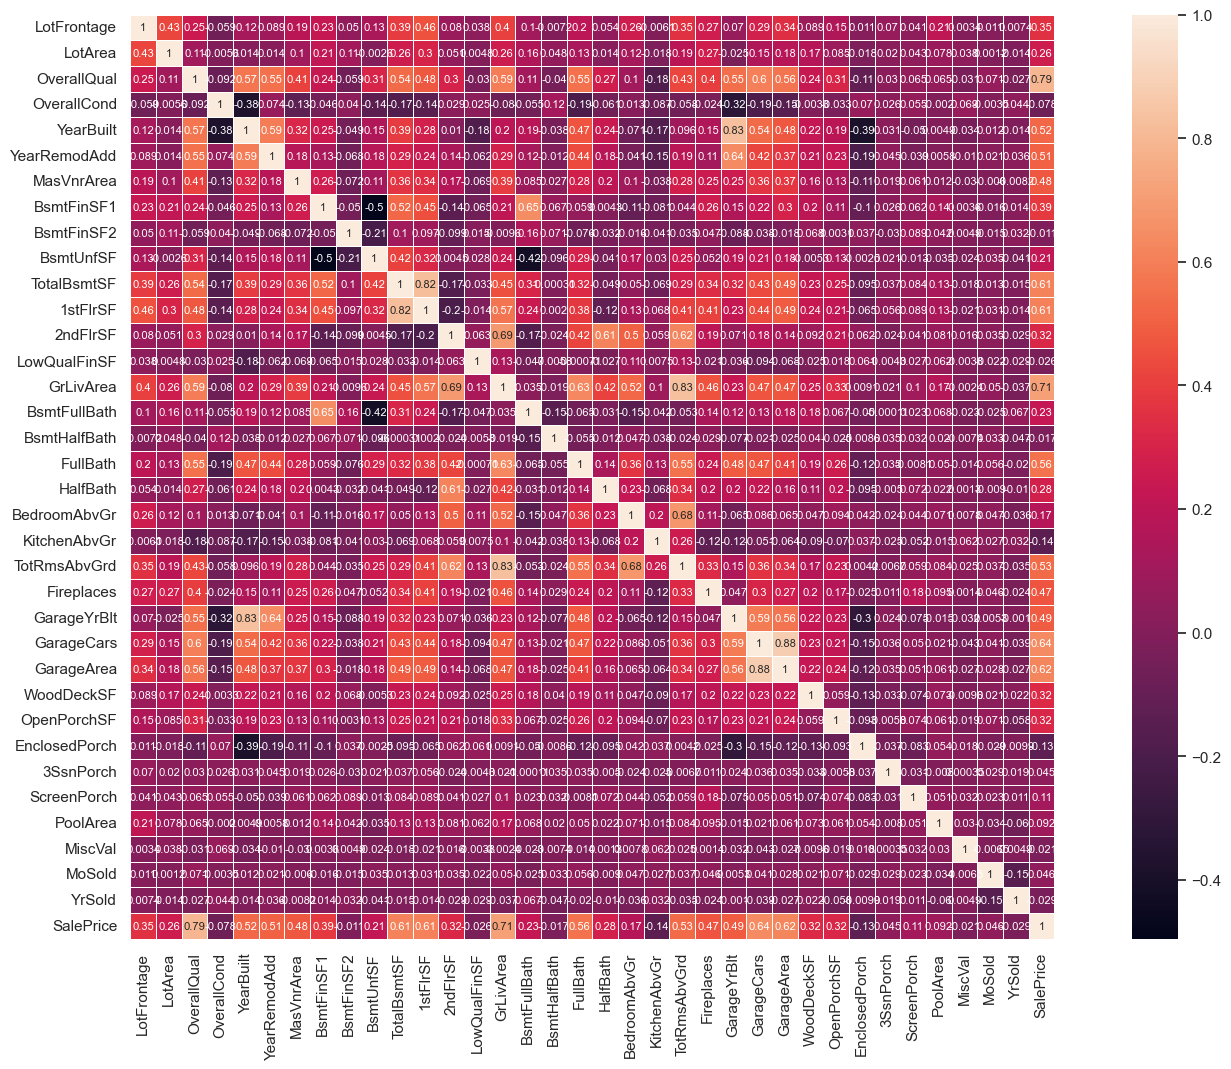

In [20]:
sns.set(rc={"figure.figsize": (20, 12)})

sns.heatmap(numeric_columns.corr(), 
            annot=True, 
            cbar=True, 
            linewidths=0.5, 
            linecolor='white', square=True,
            annot_kws={"size": 8})

Com o gráfico de correlação acima, é possível perceber forte correlações entre pares de váriaveis. Outro ponto que pode-se analisar para o feature selection, visto que se duas features variam da mesma forma, elas vão ter relação parecida com a target. Se a target aumenta, ambas as features aumentam, já que são autamente correlacionadas. Assim é redundante ter as duas para o modelo preditivo.
Exemplos:
- GarageArea e GarageCars possuem uma correlação de 0,88
- YearBuilt e GarageYrBlt possuem uma correlação de 0,83
- GrLivArea e TotRmsAbvGrd possuem uma correlação de 0,83
- TotalBsmtSF e 1stFlrSF possuem uma correlação de 0,82

In [14]:
correlacao = numeric_columns.corrwith(numeric_columns['SalePrice'])

c_max = 0.4

col_corr = correlacao[(correlacao > c_max) | (correlacao < -c_max)].index

correlated_num = numeric_columns[col_corr]

correlated_num

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,175000
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,142125


In [15]:
print(f'Verificou-se quais features possuíam correlação superior a {c_max} (tanto positiva quanto negativa) com a target. Retornando apenas {len(correlated_num.columns)} features.')

Verificou-se quais features possuíam correlação superior a 0.4 (tanto positiva quanto negativa) com a target. Retornando apenas 14 features.


In [17]:
#valores unicos entre as features que possuem maior correlação com a target
correlated_num.nunique().sort_values()

FullBath          4
Fireplaces        4
GarageCars        5
OverallQual      10
TotRmsAbvGrd     12
YearRemodAdd     61
GarageYrBlt      97
YearBuilt       112
MasVnrArea      327
GarageArea      441
SalePrice       663
TotalBsmtSF     721
1stFlrSF        753
GrLivArea       861
dtype: int64

Dentre as features que possuem maior correlação com a target, e que se enquadram em valores continuos (mais de 20 valores unicos), plotaremos o bloxpot dessas features para ver como os dados estão distribuidos

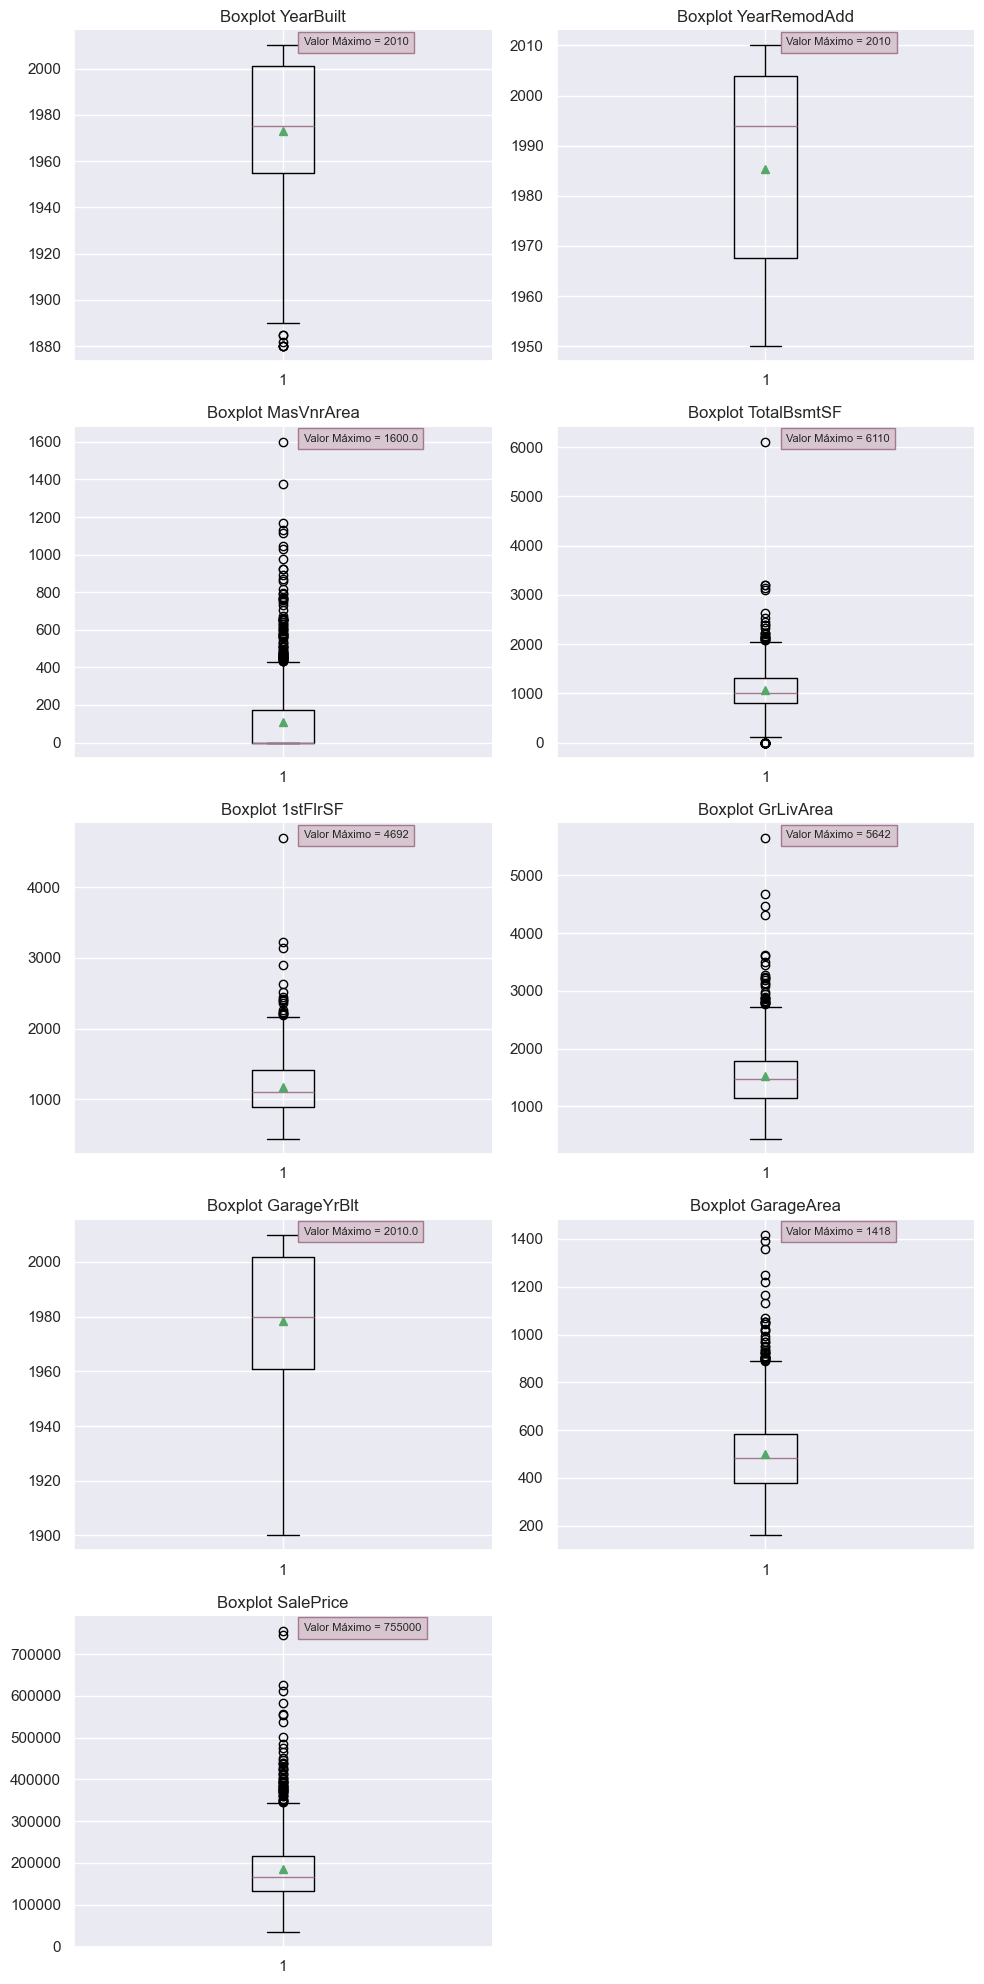

In [24]:
columns_bp = correlated_num.dropna().columns[correlated_num.dropna().nunique() >= 20].to_list()

custom_funcs.grafico_bloxpot(columns_bp, correlated_num.dropna())

É possível verificar a alta quantidade de outliers nas features que não são relacionadas a ano.
___
- Qual a relação entre algumas features que tratam de área? Se a área do lote é maior, consequentemente a área da casa ou da garagem é maior?

In [25]:
data[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'PoolArea']].sort_values(by='GarageArea' ,ascending=False)

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea
1298,63887,6110,5642,1418,480
581,12704,2042,2042,1390,0
1190,32463,1249,1622,1356,0
1061,18000,894,894,1248,0
825,14803,2078,2084,1220,0
...,...,...,...,...,...
1323,5330,420,708,0,0
78,10778,1768,1768,0,0
620,8248,864,864,0,0
1325,3636,796,796,0,0


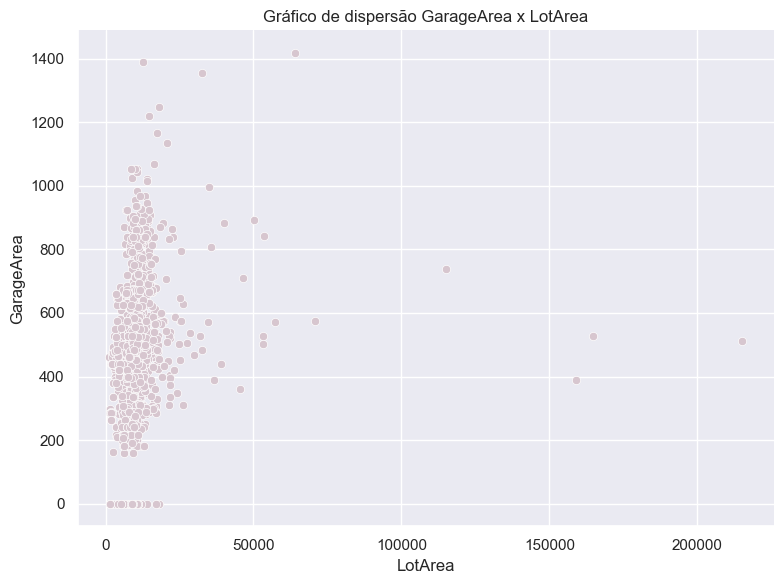

In [26]:
custom_funcs.grafico_dispersao(data, 'LotArea', 'GarageArea')

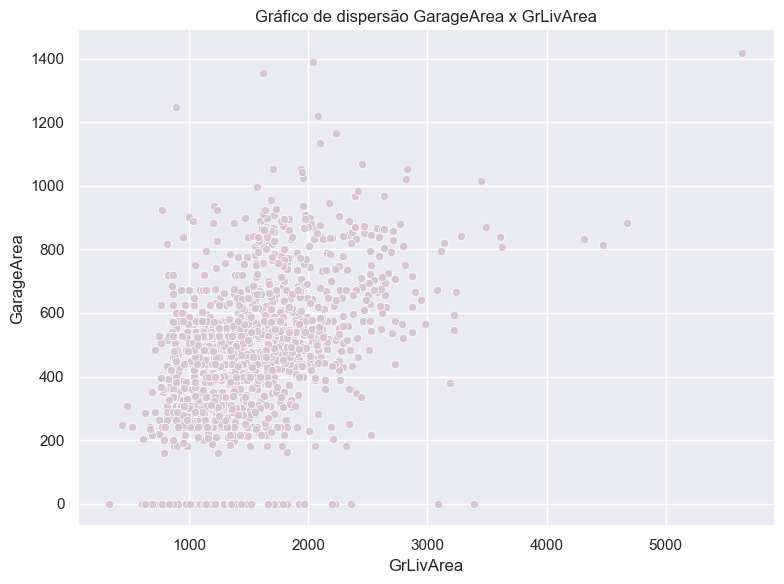

In [27]:
custom_funcs.grafico_dispersao(data, 'GrLivArea', 'GarageArea')

A área do lote com a área da garagem não há tanta relação, no entanto a área do lote com a área da casa, podemos perceber uma leve  tendencia a correlação positiva, mas como vimos no gráfico de correlação, o valor é de apenas 0,26
___
- Como a feature LotFrontage se comporta em cada categoria da feature LotConfig?

In [19]:
data[data['LotFrontage'].isnull()]['LotConfig'].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

In [20]:
data.groupby('LotConfig')['LotFrontage'].agg(['size','mean','median','std'])

,size,mean,median,std
LotConfig,,,,
Corner,263,84.039801,80.0,29.896294
CulDSac,94,59.911111,50.0,25.659326
FR2,47,63.515152,64.0,20.294890
FR3,4,70.750000,59.5,40.516458
Inside,1052,67.715686,68.0,21.692025


De acordo com o describe feito anteriormente, a feature LotFrontage	tem a média de 70,05 e a mediana de 69. podemos perceber que esses valores mudam bastante de acordo com o LotConfig, como por exemplo quando é a categoria Corner, a média/mediana fica em torno de 80/84.
___
- Ao olhar para YearBuilt e GarageYrBlt, existe o caso do ano da construção da garagem ser anterior ao da construção da casa?

In [21]:
garagem = data[data['YearBuilt'] > data['GarageYrBlt']][['YearBuilt','GarageYrBlt']]

print(f'Existem {garagem.shape[0]} registros onde o ano de construção da garagem é anterior ao da construção da casa')

garagem

Existem 9 registros onde o ano de construção da garagem é anterior ao da construção da casa


,YearBuilt,GarageYrBlt
29,1927,1920.0
93,1910,1900.0
324,1967,1961.0
600,2005,2003.0
736,1950,1949.0
1103,1959,1954.0
1376,1930,1925.0
1414,1923,1922.0
1418,1963,1962.0


Essas 9 instâncias podem ser um erro de registro, como pode ser realmente o caso da garagem ser construída antes da casa. Só seria possivel validar essa hipótese conversando com a área de negócio para entender melhor.
___
- Os preços de venda aumentaram ao decorrer dos anos?

In [22]:
custom_funcs.grafico_bloxpot_categorias(data, 'YrSold', 'SalePrice')

Pode-se perceber que a média entre os anos foi estável, no entanto houve a ocorrência de outliers em todos os anos.
___
- Quanto maior a área do lote, maior o preço da casa?

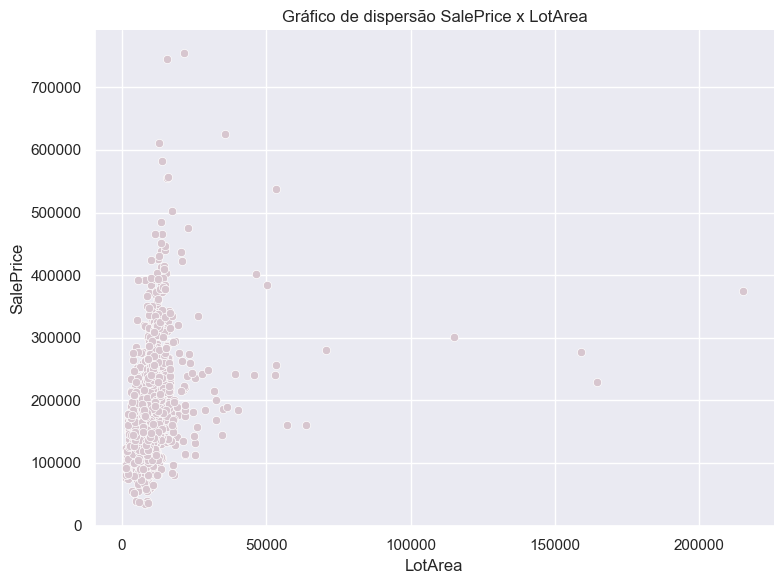

In [23]:
custom_funcs.grafico_dispersao(data, 'LotArea', 'SalePrice')

Os dados estão concentrados no canto esquerdo do gráfico, não apresentando uma relação linear crescente ou decrescente entre as variáveis. No entanto consegue-se observar a presença de alguns outliers, que se afastam do conjunto de dados.
___
- Casas mais antigas tem um valor de venda menor?

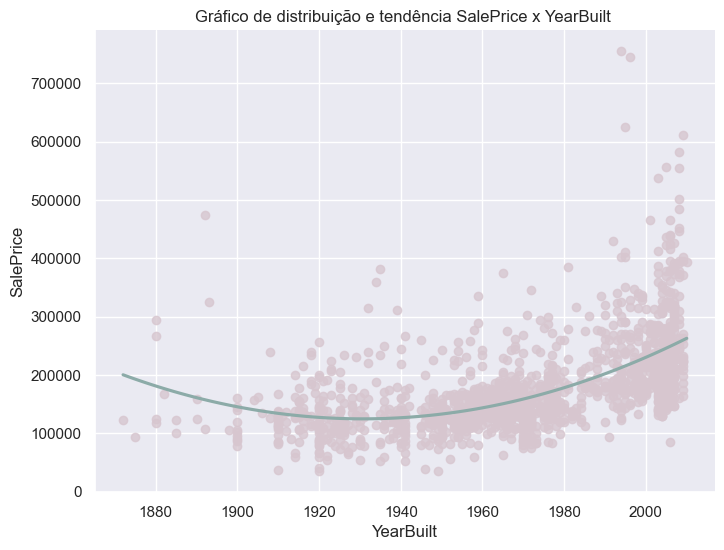

In [24]:
modelo = np.polyfit(data['YearBuilt'], data['SalePrice'], 2)
tendencia = np.poly1d(modelo)

g = sns.regplot(x='YearBuilt', y='SalePrice', data = data, ci=None, order=2, color = '#d7c6cf', line_kws={'color': '#8caba8'}, label='Curva de Tendência')

plt.title('Gráfico de distribuição e tendência SalePrice x YearBuilt ', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

A curva de tendencia dos dados não apresenta um crescimento linear, pois apresenta valores mais altos no canto esquerdo e direito da curva em relação o centro.
___
- Casas reformadas recentemente tem um valor de venda maior?

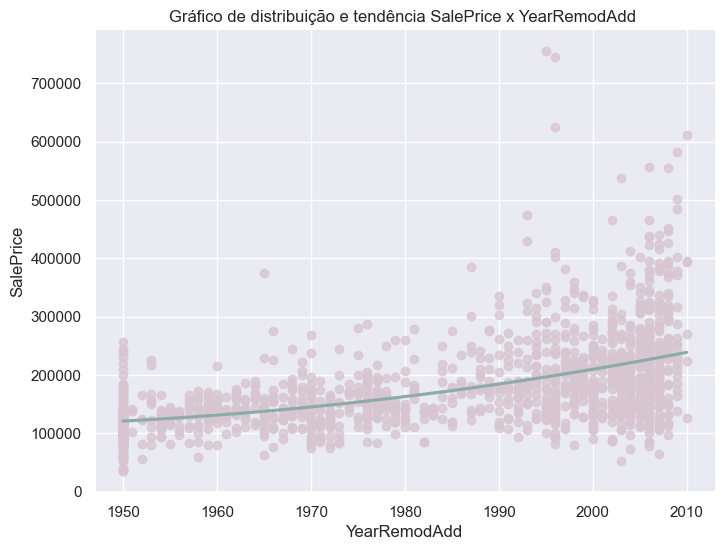

In [25]:
linha = np.polyfit(data['YearRemodAdd'], data['SalePrice'], 2)
tendencia = np.poly1d(linha)

g = sns.regplot(x='YearRemodAdd', y='SalePrice', data = data, ci=None, order=2, color = '#d7c6cf', line_kws={'color': '#8caba8'}, label='Curva de Tendência')

plt.title('Gráfico de distribuição e tendência SalePrice x YearRemodAdd ', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Nesse caso, pode-se observar que a curva de tendencia dos dados é crescente. Comparando com o gráfico anterior, percebe-se que as casas mais antigas, construídas entre os anos de 1880 e 1950 foram reformadas, pois no gráfico de ano de reforma não há a presença desses anos. O que pode ter ajudado a curva de tendencia ser crescente, visto que no gráfico anterior, se analisado de 1950 para frente, há uma tendencia de crescimento.
___
- Quanto maior a área do porão, maior o preço da casa?

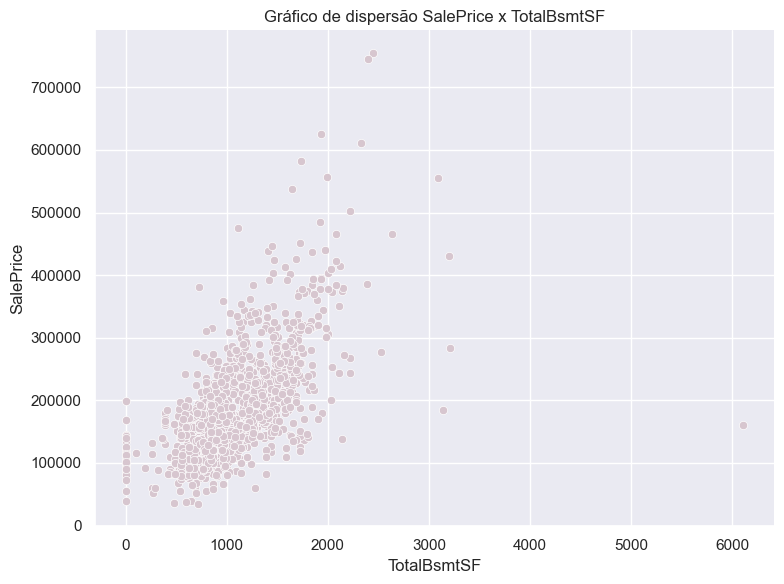

In [31]:
custom_funcs.grafico_dispersao(data, 'TotalBsmtSF', 'SalePrice')

Pode-se perceber uma tendencia linear crescente nos dados, mais agrupados entre eles, com a presença de alguns outliers, apresentando alto valor de TotalBsmtSF e baixo valor de SalePrice. Pode-se perceber também, a presença de um conjunto de dados no valor 0 da feature TotalBsmtSF.
___
- Quanto maior a garagem, maior o preço da casa?

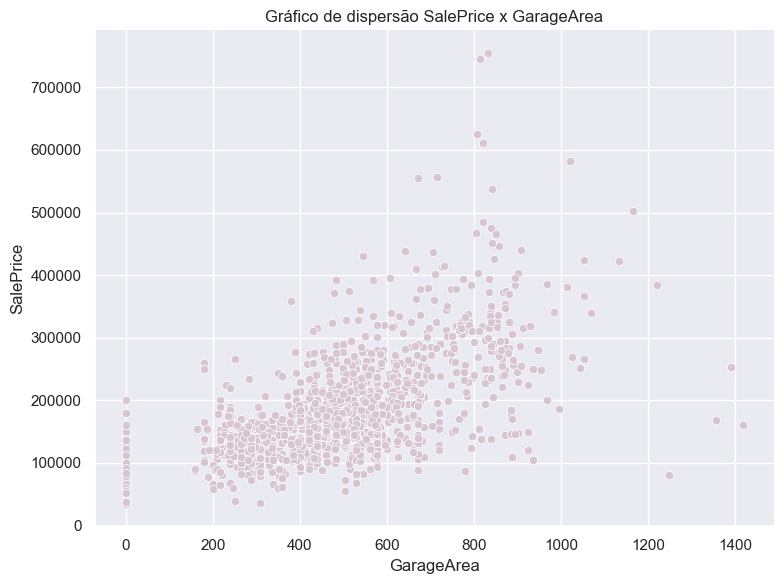

In [32]:
custom_funcs.grafico_dispersao(data, 'GarageArea', 'SalePrice')

Nesse gráfico também pode-se perceber uma tendencia linear crescente nos dados, mas já percebe-se um menor agrupamento dos dados em relação ao centro em relação ao gráfico anterior. Percebe-se a presença de alguns outliers. Como no gráfico anterior, pode-se perceber também, a presença de um conjunto de dados no valor 0 da feature GarageArea.
___
- Piscina valoriza o preço de venda?

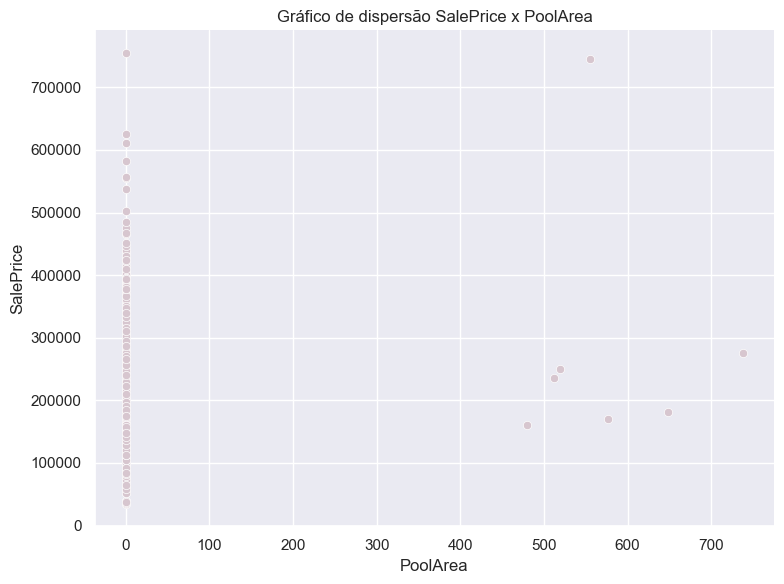

In [33]:
custom_funcs.grafico_dispersao(data, 'PoolArea', 'SalePrice')

Nesse gráfico podemos perceber que a maioria das casas a venda não possuem piscina (devido a feature PoolArea = 0), além do que as casas que tem piscina tem um valor mais baixo.
___
- A quantidade de carros que cabem na garagem é proporcional ao tamanho da garagem?

In [29]:
custom_funcs.grafico_bloxpot_categorias(data[['GarageCars', 'GarageArea']].dropna(), 'GarageCars', 'GarageArea')

Ao plotar o gráfico de Boxplot, percebemos que a média é crescente de acordo com a Área da garagem X quantidade de carros. No entanto percebe-se uma maior presença de outliers, principalmente quando a feature GarageCars é igual a 1.
___
- Como minhas casas estão distribuidas de acordo com o tipo de rua?

In [30]:
data.groupby(['Street']).size()

Street
Grvl       6
Pave    1454
dtype: int64

Verificou-se que menos de 0,5% dos dados possuem o tipo de rua como Gravel.
___
- Como minhas casas estão distribuidas de acordo com as utilidades da casa?

In [34]:
data.groupby(['Utilities']).size()

Utilities
AllPub    1459
NoSeWa       1
dtype: int64

Verificou-se a presença de apenas 1 registro possuindo Electricity and GasOnly, sendo a grande maioria de All public Utilities. \
Essas duas últimas análises mostram o desbalanceamento de algumas classes do dataset.
___
- Qual é a média de preços de acordo com a vizinhança?

In [35]:
result = data.groupby('Neighborhood')['SalePrice'].agg(['size','mean','median','std'])\
    .sort_values(by='size' ,ascending=False)

result.style.bar(subset=['mean'], color='#a2798f')\
    .bar(subset=['mean'], color='#a2798f', vmin=0, width=100)

,size,mean,median,std
Neighborhood,,,,
NAmes,225,145847.080000,140000.000000,33075.345450
CollgCr,150,197965.773333,197200.000000,51403.666438
OldTown,113,128225.300885,119000.000000,52650.583185
Edwards,100,128219.700000,121750.000000,43208.616459
Somerst,86,225379.837209,225500.000000,56177.555888
Gilbert,79,192854.506329,181000.000000,35986.779085
NridgHt,77,316270.623377,315000.000000,96392.544954
Sawyer,74,136793.135135,135000.000000,22345.129157
NWAmes,73,189050.068493,182900.000000,37172.218106


Pode-se perceber que a média de valor de venda da casa tem uma alta variância entre diferentes bairros. No entanto, percebe-se que a média e a mediana dos preços das casas em cada bairro são próximas, apresentando baixa variabilidade.
___
- Qual é a média de preços de acordo com a condição de venda?

In [36]:
result = data.groupby('SaleCondition')['SalePrice'].agg(['size','mean','median','std'])\
    .sort_values(by='size' ,ascending=False)

result.style.bar(subset=['mean'], color='#a2798f')\
    .bar(subset=['mean'], color='#a2798f', vmin=0, width=100)

,size,mean,median,std
SaleCondition,,,,
Normal,1198,175202.219533,160000.000000,69713.636280
Partial,125,272291.752000,244600.000000,103696.404119
Abnorml,101,146526.623762,130000.000000,82796.213395
Family,20,149600.000000,140500.000000,47820.002421
Alloca,12,167377.416667,148145.000000,84460.527502
AdjLand,4,104125.000000,104000.000000,26135.464411


Percebe-se que grande parte das vendas foi na condição normal, mas há um ponto de atenção na condição Parcial que apresenta um alto valor médio de venda.
___
- Como a maior frequência é a de venda na condição normal, dentro dessa categoria, como variam os preços de acordo com o tipo de venda?

In [37]:
normal = data[data['SaleCondition'] == 'Normal']

result = normal.groupby('SaleType')['SalePrice'].agg(['size','mean','median','std'])\
    .sort_values(by='size' ,ascending=False)

result.style.bar(subset=['mean'], color='#a2798f')\
    .bar(subset=['mean'], color='#a2798f', vmin=0, width=100)

,size,mean,median,std
SaleType,,,,
WD,1160,175714.275000,160100.000000,69667.203618
COD,19,142239.473684,127500.000000,35534.445648
ConLD,6,141500.000000,142250.000000,38820.097888
ConLw,5,143700.000000,144000.000000,67291.901444
ConLI,4,219237.500000,157500.000000,160544.362379
CWD,2,188750.000000,188750.000000,43487.067043
Con,2,269600.000000,269600.000000,76933.217793


Percebe-se que grande parte das vendas foi do tipo WD (Warranty Deed - VALoan), com poucas ocorrências dos outros tipos de vendas (aproximadamente 3% apenas).
___
- Como a condição da casa e o ano de reforma/ano de construção afetam os preços de venda

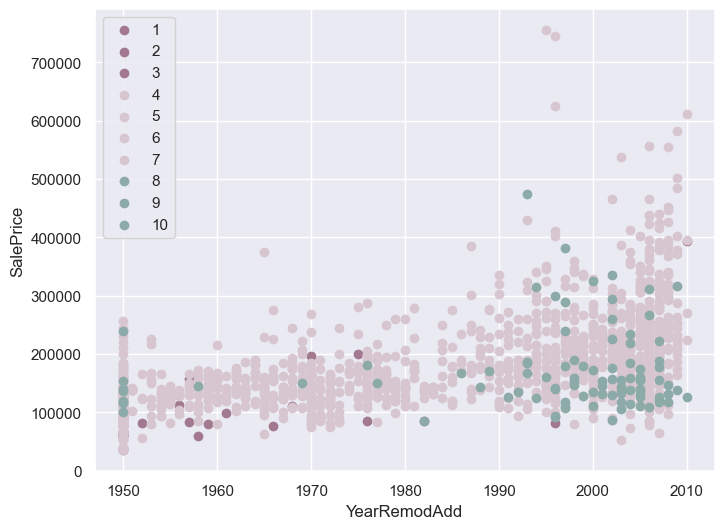

In [38]:
# agrupou-se as notas em 3, sendo 1,2 e 3 em uma cor, 4,5,6 e 7 em outra cor, e 8,9 e 10 em uma terceira cor.
cores = {1: '#a2798f', 2: '#a2798f', 3: '#a2798f', 4: '#d7c6cf', 5: '#d7c6cf', 6: '#d7c6cf',\
         7: '#d7c6cf', 8: '#8caba8', 9: '#8caba8', 10: '#8caba8'}


for grupo, cor in cores.items():
    subset = data[data['OverallCond'] == grupo]
    plt.scatter(subset['YearRemodAdd'], subset['SalePrice'], label=grupo, c=cor)

# Adicione rótulos e legenda
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.legend()

# Exiba o gráfico
plt.show()

Percebe-se que grande parte dos dados está com a condição da casa no grupo mediano, que está distribuído por todos os anos. Já o grupo inferior mostra maior parte de seus dados em casas mais antigas de menor valor. E o grupo superior mostra um maior agrupamento em casas mais novas, no entanto também ocorre em algumas casas mais antigas.